# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict credit quality for a number of student loans.

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/student_loans.csv")
df = pd.read_csv(data)
df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["credit_ranking"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

Metal device set to: Apple M1 Max


2022-03-08 14:46:39.106638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-08 14:46:39.106759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200


2022-03-08 14:46:39.168327: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-08 14:46:39.295879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 7ms/step - loss: 24.4929 - mse: 24.4929 - val_loss: 20.7245 - val_mse: 20.7245
Epoch 2/200
29/35 [=======================>......] - ETA: 0s - loss: 21.7655 - mse: 21.7655

2022-03-08 14:46:39.572757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 5ms/step - loss: 21.4407 - mse: 21.4407 - val_loss: 18.4318 - val_mse: 18.4318
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 18.5701 - mse: 18.5701 - val_loss: 16.1701 - val_mse: 16.1701
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 15.8419 - mse: 15.8419 - val_loss: 13.9931 - val_mse: 13.9931
Epoch 5/200
35/35 [==============================] - 0s 5ms/step - loss: 13.2989 - mse: 13.2989 - val_loss: 11.9237 - val_mse: 11.9237
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 10.9910 - mse: 10.9910 - val_loss: 10.0509 - val_mse: 10.0509
Epoch 7/200
35/35 [==============================] - 0s 5ms/step - loss: 8.9647 - mse: 8.9647 - val_loss: 8.3989 - val_mse: 8.3989
Epoch 8/200
35/35 [==============================] - 0s 5ms/step - loss: 7.2429 - mse: 7.2429 - val_loss: 6.9112 - val_mse: 6.9112
Epoch 9/200
35/35 [==============================] - 0s 5ms/step - loss: 5.

35/35 [==============================] - 0s 5ms/step - loss: 0.6946 - mse: 0.6946 - val_loss: 0.8808 - val_mse: 0.8808
Epoch 65/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6805 - mse: 0.6805 - val_loss: 0.8682 - val_mse: 0.8682
Epoch 66/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6661 - mse: 0.6661 - val_loss: 0.8523 - val_mse: 0.8523
Epoch 67/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6553 - mse: 0.6553 - val_loss: 0.8411 - val_mse: 0.8411
Epoch 68/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6442 - mse: 0.6442 - val_loss: 0.8285 - val_mse: 0.8285
Epoch 69/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6328 - mse: 0.6328 - val_loss: 0.8152 - val_mse: 0.8152
Epoch 70/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6224 - mse: 0.6224 - val_loss: 0.8060 - val_mse: 0.8060
Epoch 71/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6128 - mse: 0

Epoch 126/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4247 - mse: 0.4247 - val_loss: 0.5240 - val_mse: 0.5240
Epoch 127/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4238 - mse: 0.4238 - val_loss: 0.5280 - val_mse: 0.5280
Epoch 128/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4228 - mse: 0.4228 - val_loss: 0.5192 - val_mse: 0.5192
Epoch 129/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4207 - mse: 0.4207 - val_loss: 0.5178 - val_mse: 0.5178
Epoch 130/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4206 - mse: 0.4206 - val_loss: 0.5246 - val_mse: 0.5246
Epoch 131/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4192 - mse: 0.4192 - val_loss: 0.5185 - val_mse: 0.5185
Epoch 132/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4182 - mse: 0.4182 - val_loss: 0.5180 - val_mse: 0.5180
Epoch 133/200
35/35 [==============================] - 0s 5ms/step - 

35/35 [==============================] - 0s 5ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.4685 - val_mse: 0.4685
Epoch 188/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3866 - mse: 0.3866 - val_loss: 0.4677 - val_mse: 0.4677
Epoch 189/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3861 - mse: 0.3861 - val_loss: 0.4714 - val_mse: 0.4714
Epoch 190/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3843 - mse: 0.3843 - val_loss: 0.4702 - val_mse: 0.4702
Epoch 191/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.4721 - val_mse: 0.4721
Epoch 192/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3847 - mse: 0.3847 - val_loss: 0.4714 - val_mse: 0.4714
Epoch 193/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3826 - mse: 0.3826 - val_loss: 0.4672 - val_mse: 0.4672
Epoch 194/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3825 -

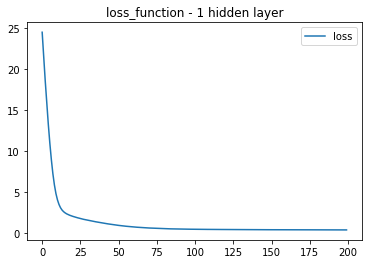

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

## Define a model with 2 hidden layers

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
24/35 [===================>..........] - ETA: 0s - loss: 26.6428 - mse: 26.6428

2022-03-08 14:47:14.080579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 1s 8ms/step - loss: 26.3351 - mse: 26.3351 - val_loss: 22.4724 - val_mse: 22.4724
Epoch 2/200
24/35 [===================>..........] - ETA: 0s - loss: 23.8727 - mse: 23.8727

2022-03-08 14:47:14.358866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 0s 6ms/step - loss: 23.0689 - mse: 23.0689 - val_loss: 18.8051 - val_mse: 18.8051
Epoch 3/200
35/35 [==============================] - 0s 6ms/step - loss: 19.0734 - mse: 19.0734 - val_loss: 14.7400 - val_mse: 14.7400
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 14.6613 - mse: 14.6613 - val_loss: 10.6201 - val_mse: 10.6201
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 10.3918 - mse: 10.3918 - val_loss: 7.2370 - val_mse: 7.2370
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 6.9737 - mse: 6.9737 - val_loss: 5.0924 - val_mse: 5.0924
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 4.8937 - mse: 4.8937 - val_loss: 4.0221 - val_mse: 4.0221
Epoch 8/200
35/35 [==============================] - 0s 5ms/step - loss: 3.8147 - mse: 3.8147 - val_loss: 3.4370 - val_mse: 3.4370
Epoch 9/200
35/35 [==============================] - 0s 5ms/step - loss: 3.1970 -

35/35 [==============================] - 0s 5ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.5573 - val_mse: 0.5573
Epoch 65/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4712 - mse: 0.4712 - val_loss: 0.5503 - val_mse: 0.5503
Epoch 66/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4674 - mse: 0.4674 - val_loss: 0.5428 - val_mse: 0.5428
Epoch 67/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4634 - mse: 0.4634 - val_loss: 0.5403 - val_mse: 0.5403
Epoch 68/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4604 - mse: 0.4604 - val_loss: 0.5409 - val_mse: 0.5409
Epoch 69/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.5334 - val_mse: 0.5334
Epoch 70/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4539 - mse: 0.4539 - val_loss: 0.5318 - val_mse: 0.5318
Epoch 71/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4502 - mse: 0

Epoch 126/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3843 - mse: 0.3843 - val_loss: 0.4787 - val_mse: 0.4787
Epoch 127/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3832 - mse: 0.3832 - val_loss: 0.4860 - val_mse: 0.4860
Epoch 128/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3843 - mse: 0.3843 - val_loss: 0.4788 - val_mse: 0.4788
Epoch 129/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3837 - mse: 0.3837 - val_loss: 0.4750 - val_mse: 0.4750
Epoch 130/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3838 - mse: 0.3838 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 131/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3823 - mse: 0.3823 - val_loss: 0.4824 - val_mse: 0.4824
Epoch 132/200
35/35 [==============================] - 0s 6ms/step - loss: 0.3827 - mse: 0.3827 - val_loss: 0.4625 - val_mse: 0.4625
Epoch 133/200
35/35 [==============================] - 0s 5ms/step - 

35/35 [==============================] - 0s 5ms/step - loss: 0.3697 - mse: 0.3697 - val_loss: 0.4704 - val_mse: 0.4704
Epoch 188/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3710 - mse: 0.3710 - val_loss: 0.4664 - val_mse: 0.4664
Epoch 189/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3674 - mse: 0.3674 - val_loss: 0.4626 - val_mse: 0.4626
Epoch 190/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3695 - mse: 0.3695 - val_loss: 0.4817 - val_mse: 0.4817
Epoch 191/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3698 - mse: 0.3698 - val_loss: 0.4872 - val_mse: 0.4872
Epoch 192/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3697 - mse: 0.3697 - val_loss: 0.4632 - val_mse: 0.4632
Epoch 193/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3673 - mse: 0.3673 - val_loss: 0.4809 - val_mse: 0.4809
Epoch 194/200
35/35 [==============================] - 0s 5ms/step - loss: 0.3700 -

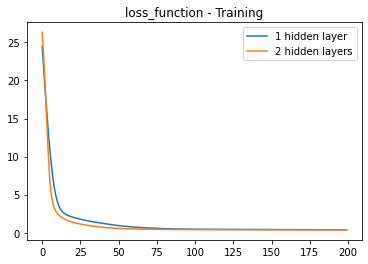

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

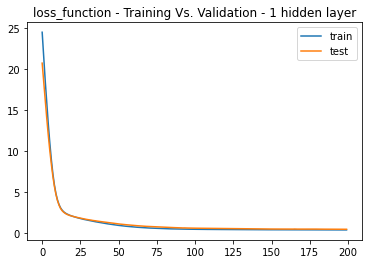

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

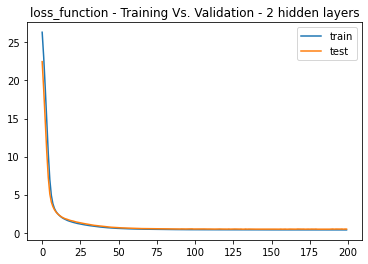

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()